<a href="https://colab.research.google.com/github/vaibhav1595/Human-Activity-Recognition-Using-Smartphones/blob/master/Smartphone_Based_Recognition_of_Human_Activities_and_Postural_Transitions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Smartphone Based Recognition of Human Activities and Postural Transitions 

---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### About UCI Human Activity Recognition Using smartphones Dataset

Activity recognition data set built from the recordings of 30 subjects performing basic activities and postural transitions while carrying a waist-mounted smartphone with embedded inertial sensors.



In [2]:
# Data Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
sns.set(style="darkgrid")

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Process dataset

In [3]:
# Get Features

with open("/content/drive/My Drive/Colab Notebooks/Smartphone Based Recognition of Human Activities and Postural Transitions/features.txt", "r") as _: 
  features = [x.strip().replace('()', '').replace(',', '').split(' ')[-1] for x in _.readlines()]
    
print("Number of Features:", len(features))
print("Features:\n",features[:5])

Number of Features: 561
Features:
 ['tBodyAcc-Mean-1', 'tBodyAcc-Mean-2', 'tBodyAcc-Mean-3', 'tBodyAcc-STD-1', 'tBodyAcc-STD-2']


### Train Data

In [0]:
# Get ID's of Participants

with open('/content/drive/My Drive/Colab Notebooks/Smartphone Based Recognition of Human Activities and Postural Transitions/Train/subject_id_train.txt', 'r') as _: 
  train_id = pd.Series([int(x.strip()) for x in _.readlines()])

In [5]:
# Get activity labels

with open('/content/drive/My Drive/Colab Notebooks/Smartphone Based Recognition of Human Activities and Postural Transitions/Train/y_train.txt', 'r') as _: 
  y_train = pd.Series([int(x.strip()) for x in _.readlines()])

y_train.value_counts().sort_index()

1     1226
2     1073
3      987
4     1293
5     1423
6     1413
7       47
8       23
9       75
10      60
11      90
12      57
dtype: int64

In [6]:
# Create train dataframe 
X_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Smartphone Based Recognition of Human Activities and Postural Transitions/Train/X_train.txt', sep=" ", header=None)
X_train.columns = features
X_train

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,tBodyAcc-Max-2,tBodyAcc-Max-3,tBodyAcc-Min-1,tBodyAcc-Min-2,tBodyAcc-Min-3,tBodyAcc-SMA-1,tBodyAcc-Energy-1,tBodyAcc-Energy-2,tBodyAcc-Energy-3,tBodyAcc-IQR-1,tBodyAcc-IQR-2,tBodyAcc-IQR-3,tBodyAcc-ropy-1,tBodyAcc-ropy-1,tBodyAcc-ropy-1,tBodyAcc-ARCoeff-1,tBodyAcc-ARCoeff-2,tBodyAcc-ARCoeff-3,tBodyAcc-ARCoeff-4,tBodyAcc-ARCoeff-5,tBodyAcc-ARCoeff-6,tBodyAcc-ARCoeff-7,tBodyAcc-ARCoeff-8,tBodyAcc-ARCoeff-9,tBodyAcc-ARCoeff-10,tBodyAcc-ARCoeff-11,tBodyAcc-ARCoeff-12,tBodyAcc-Correlation-1,tBodyAcc-Correlation-2,tBodyAcc-Correlation-3,...,fBodyAccJerkMag-Energy-1,fBodyAccJerkMag-IQR-1,fBodyAccJerkMag-ropy-1,fBodyAccJerkMag-MaxInds-1,fBodyAccJerkMag-MeanFreq-1,fBodyAccJerkMag-Skewness-1,fBodyAccJerkMag-Kurtosis-1,fBodyGyroMag-Mean-1,fBodyGyroMag-STD-1,fBodyGyroMag-Mad-1,fBodyGyroMag-Max-1,fBodyGyroMag-Min-1,fBodyGyroMag-SMA-1,fBodyGyroMag-Energy-1,fBodyGyroMag-IQR-1,fBodyGyroMag-ropy-1,fBodyGyroMag-MaxInds-1,fBodyGyroMag-MeanFreq-1,fBodyGyroMag-Skewness-1,fBodyGyroMag-Kurtosis-1,fBodyGyroJerkMag-Mean-1,fBodyGyroJerkMag-STD-1,fBodyGyroJerkMag-Mad-1,fBodyGyroJerkMag-Max-1,fBodyGyroJerkMag-Min-1,fBodyGyroJerkMag-SMA-1,fBodyGyroJerkMag-Energy-1,fBodyGyroJerkMag-IQR-1,fBodyGyroJerkMag-ropy-1,fBodyGyroJerkMag-MaxInds-1,fBodyGyroJerkMag-MeanFreq-1,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,-0.744893,-0.648447,0.841796,0.708440,0.651716,-0.975752,-0.999950,-0.999888,-0.998014,-0.993999,-0.991980,-0.970970,-0.547095,-0.700974,-0.622697,0.921884,-0.719483,0.342168,-0.161318,0.266049,-0.274351,0.267205,-0.020958,0.382610,-0.501748,0.512463,-0.206337,0.376778,0.435172,0.660199,...,-0.999918,-0.991736,-1.000000,-0.936508,0.349260,-0.517127,-0.801006,-0.980135,-0.961301,-0.974129,-0.956013,-0.989894,-0.980135,-0.999240,-0.992673,-0.701291,-1.000000,-0.132480,0.565697,0.363478,-0.991994,-0.990877,-0.990169,-0.992521,-0.991044,-0.991994,-0.999937,-0.990537,-0.871306,-1.000000,-0.012236,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,-0.736338,-0.712415,0.838758,0.708440,0.659340,-0.987427,-0.999993,-0.999826,-0.999411,-0.998918,-0.985482,-0.973481,-0.781973,-0.534604,-0.593165,0.607435,-0.266783,0.275882,0.200417,0.131266,-0.149017,0.292436,-0.192986,0.217496,-0.089175,0.059909,-0.236609,-0.012696,-0.072711,0.578649,...,-0.999867,-0.991506,-1.000000,-0.841270,0.533688,-0.625993,-0.898311,-0.988296,-0.983313,-0.982951,-0.987406,-0.992134,-0.988296,-0.999811,-0.993996,-0.720683,-0.948718,-0.268979,-0.364219,-0.723724,-0.995857,-0.996580,-0.995671,-0.996939,-0.994436,-0.995857,-0.999981,-0.994623,-1.000000,-1.000000,0.202804,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,-0.736338,-0.712415,0.834002,0.705008,0.674551,-0.988528,-0.999972,-0.999719,-0.999803,-0.996898,-0.976781,-0.986754,-0.688176,-0.520514,-0.593165,0.272262,-0.056424,0.322283,-0.273292,0.037180,-0.133612,0.332487,-0.240491,0.348733,-0.195409,0.229436,-0.316816,-0.123889,-0.181137,0.608219,...,-0.999845,-0.987029,-1.000000,-0.904762,0.661975,-0.725887,-0.926663,-0.989255,-0.986019,-0.984533,-0.991701,-0.995857,-0.989255,-0.999854,-0.993256,-0.736521,-0.794872,-0.212429,-0.564868,-0.874594,-0.995034,-0.995308,-0.994868,-0.996133,-0.995863,-0.995034,-0.999973,-0.993834,-1.000000,-0.555556,0.440079,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.80

### Test Data

In [0]:
# Get ID's of Participants

with open('/content/drive/My Drive/Colab Notebooks/Smartphone Based Recognition of Human Activities and Postural Transitions/Test/subject_id_test.txt', 'r') as _: 
  test_id = pd.Series([int(x.strip()) for x in _.readlines()])

In [8]:
# Get activity labels

with open('/content/drive/My Drive/Colab Notebooks/Smartphone Based Recognition of Human Activities and Postural Transitions/Test/y_test.txt', 'r') as _: 
  y_test = pd.Series([int(x.strip()) for x in _.readlines()])

y_test.value_counts().sort_index()

1     496
2     471
3     420
4     508
5     556
6     545
7      23
8      10
9      32
10     25
11     49
12     27
dtype: int64

In [9]:
# Create test dataframe 
X_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Smartphone Based Recognition of Human Activities and Postural Transitions/Test/X_test.txt', sep=" ", header=None)
X_test.columns = features
X_test

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,tBodyAcc-Max-2,tBodyAcc-Max-3,tBodyAcc-Min-1,tBodyAcc-Min-2,tBodyAcc-Min-3,tBodyAcc-SMA-1,tBodyAcc-Energy-1,tBodyAcc-Energy-2,tBodyAcc-Energy-3,tBodyAcc-IQR-1,tBodyAcc-IQR-2,tBodyAcc-IQR-3,tBodyAcc-ropy-1,tBodyAcc-ropy-1,tBodyAcc-ropy-1,tBodyAcc-ARCoeff-1,tBodyAcc-ARCoeff-2,tBodyAcc-ARCoeff-3,tBodyAcc-ARCoeff-4,tBodyAcc-ARCoeff-5,tBodyAcc-ARCoeff-6,tBodyAcc-ARCoeff-7,tBodyAcc-ARCoeff-8,tBodyAcc-ARCoeff-9,tBodyAcc-ARCoeff-10,tBodyAcc-ARCoeff-11,tBodyAcc-ARCoeff-12,tBodyAcc-Correlation-1,tBodyAcc-Correlation-2,tBodyAcc-Correlation-3,...,fBodyAccJerkMag-Energy-1,fBodyAccJerkMag-IQR-1,fBodyAccJerkMag-ropy-1,fBodyAccJerkMag-MaxInds-1,fBodyAccJerkMag-MeanFreq-1,fBodyAccJerkMag-Skewness-1,fBodyAccJerkMag-Kurtosis-1,fBodyGyroMag-Mean-1,fBodyGyroMag-STD-1,fBodyGyroMag-Mad-1,fBodyGyroMag-Max-1,fBodyGyroMag-Min-1,fBodyGyroMag-SMA-1,fBodyGyroMag-Energy-1,fBodyGyroMag-IQR-1,fBodyGyroMag-ropy-1,fBodyGyroMag-MaxInds-1,fBodyGyroMag-MeanFreq-1,fBodyGyroMag-Skewness-1,fBodyGyroMag-Kurtosis-1,fBodyGyroJerkMag-Mean-1,fBodyGyroJerkMag-STD-1,fBodyGyroJerkMag-Mad-1,fBodyGyroJerkMag-Max-1,fBodyGyroJerkMag-Min-1,fBodyGyroJerkMag-SMA-1,fBodyGyroJerkMag-Energy-1,fBodyGyroJerkMag-IQR-1,fBodyGyroJerkMag-ropy-1,fBodyGyroJerkMag-MaxInds-1,fBodyGyroJerkMag-MeanFreq-1,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1
0,0.030914,-0.008927,0.040382,-0.938504,-0.944626,-0.759334,-0.952398,-0.950281,-0.802483,-0.757099,-0.733398,-0.407960,0.728511,0.658266,0.629169,-0.913306,-0.997966,-0.998683,-0.975818,-0.975440,-0.966793,-0.914396,-0.363822,-0.420897,0.181772,0.517928,-0.403636,0.449325,-0.147545,0.223150,-0.190143,0.155899,0.054035,0.053156,-0.000037,-0.077888,0.028585,0.077659,-0.490616,-0.711964,...,-0.993471,-0.921836,-0.484619,-1.000000,-0.031754,-0.255114,-0.698671,-0.770610,-0.797105,-0.769223,-0.834266,-0.940359,-0.770610,-0.970958,-0.798403,0.179435,-1.000000,-0.054576,-0.496820,-0.764755,-0.890169,-0.907480,-0.895518,-0.917953,-0.909825,-0.890169,-0.994105,-0.898097,-0.234815,-1.000000,0.122830,-0.345684,-0.709087,0.006462,0.162920,-0.825886,0.271151,-0.720559,0.276779,-0.051074
1,0.042548,0.001079,-0.026236,-0.975516,-0.977502,-0.960146,-0.986694,-0.978983,-0.966820,-0.757099,-0.733398,-0.701699,0.770927,0.706301,0.635732,-0.978295,-0.999618,-0.999708,-0.999158,-0.993775,-0.982664,-0.974733,-0.466563,-0.392219,-0.435565,0.504355,-0.117122,0.062621,0.188184,0.209414,-0.245994,0.390254,-0.247800,0.210276,-0.146806,0.106145,-0.022423,-0.104187,-0.429196,0.398133,...,-0.997610,-0.957543,-0.723642,-1.000000,-0.486025,-0.216243,-0.664383,-0.924461,-0.916766,-0.920964,-0.924413,-0.991454,-0.924461,-0.995727,-0.933145,-0.218860,-1.000000,-0.039379,-0.116580,-0.467260,-0.951981,-0.938387,-0.938230,-0.949994,-0.986899,-0.951981,-0.998272,-0.951332,-0.431053,-1.000000,-0.314688,-0.142804,-0.600867,-0.083495,0.017500,-0.434375,0.920593,-0.698684,0.281322,-0.076825
2,0.038297,-0.011660,-0.025643,-0.993922,-0.979215,-0.973030,-0.994298,-0.980535,-0.977508,-0.799005,-0.745911,-0.695737,0.837921,0.690520,0.659163,-0.983764,-0.999959,-0.999645,-0.999527,-0.993224,-0.983084,-0.981887,-0.707815,-0.716036,-0.560652,0.241698,-0.081234,0.055641,0.103205,0.009404,-0.123180,0.439879,-0.402218,0.305289,-0.284243,0.637201,-0.572356,0.306166,-0.323897,0.278536,...,-0.999269,-0.978591,-0.898000,-1.000000,0.143718,-0.206895,-0.638213,-0.975209,-0.973990,-0.967707,-0.984206,-0.997741,-0.975209,-0.999504,-0.968278,-0.561266,-0.897436,-0.170494,-0.692859,-0.927681,-0.985692,-0.983452,-0.983649,-0.986930,-0.989605,-0.985692,-0.999831,-0.986227,-0.809976,-0.936508,0.114730,-0.209525,-0.645500,-0.034956,0.202302,0.064103,0.14506

## Comparison of ML Classification Algorithms

Logistic Regression

In [0]:
# Logistic Regression Classification
LR = LogisticRegression()

In [11]:
#K-fold CV
accuraccies = cross_val_score(estimator = LR, X= X_train, y=y_train, cv=10)
print("Average Accuracies: ",100*np.mean(accuraccies))
print("Standart Deviation Accuracies: ",100*np.std(accuraccies))

Average Accuracies:  93.48629741670977
Standart Deviation Accuracies:  4.5698206277635425


In [12]:
# learning
LR.fit(X_train,y_train)

# prediction
print("LR Score: {}".format(100*LR.score(X_test,y_test))) 
LRscore = LR.score(X_test,y_test)

LR Score: 93.89626818469323


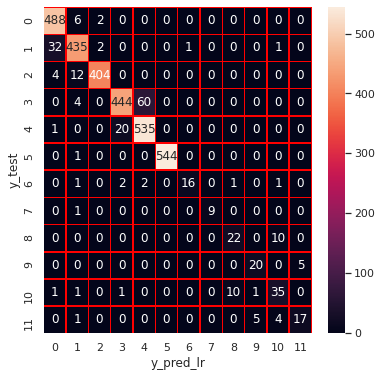

In [13]:
#Confusion Matrix
y_pred_lr= LR.predict(X_test)
CM = confusion_matrix(y_test,y_pred_lr)

#CM visualization
f, ax = plt.subplots(figsize=(6,6))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_lr")
plt.ylabel("y_test")
plt.show()

K-Nearest Neighbors Algorithm (K-NN)

In [0]:
#Create-KNN-model
KNN = KNeighborsClassifier(n_neighbors = 40) #n_neighbors = K value

In [15]:
#K-fold CV
accuraccies = cross_val_score(estimator = KNN, X= X_train, y=y_train, cv=10)
print("Average Accuracies: ",100*np.mean(accuraccies))
print("Standart Deviation Accuracies: ",100*np.std(accuraccies))

Average Accuracies:  88.27178614549747
Standart Deviation Accuracies:  3.1056370658106585


In [16]:
# learning model
KNN.fit(X_train,y_train)

# prediction
prediction = KNN.predict(X_test)
print("{}-NN Score: {}".format(40,100*KNN.score(X_test,y_test)))
KNNscore = KNN.score(X_test,y_test)

40-NN Score: 88.29854522454143


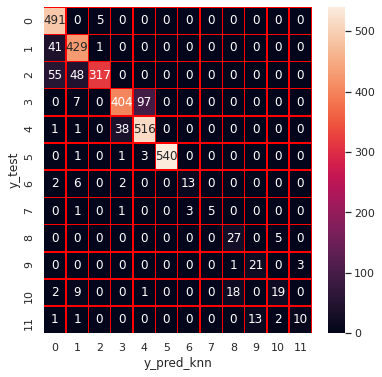

In [17]:
#Confusion Matrix
y_pred_knn= KNN.predict(X_test)
CM = confusion_matrix(y_test,y_pred_knn)

#CM visualization
f, ax = plt.subplots(figsize=(6,6))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_knn")
plt.ylabel("y_test")
plt.show()

Support Vector Machines (SVM)


In [0]:
#SVM with Sklearn
SVM = SVC(random_state=42)

In [19]:
#K-fold CV
accuraccies = cross_val_score(estimator = SVM, X= X_train, y=y_train, cv=10)
print("Average Accuracies: ",100*np.mean(accuraccies))
print("Standart Deviation Accuracies: ",100*np.std(accuraccies))

Average Accuracies:  92.76507914394513
Standart Deviation Accuracies:  4.070023349854936


In [20]:
# learning
SVM.fit(X_train,y_train)  

# prediction
print("SVM Score:", 100*SVM.score(X_test,y_test))
SVMscore = SVM.score(X_test,y_test)

SVM Score: 93.67488931056293


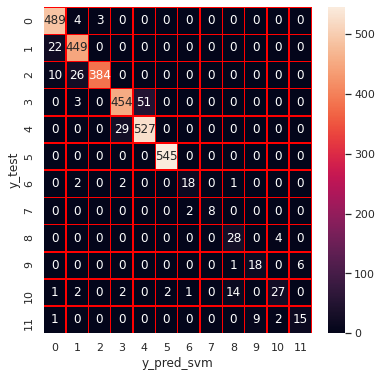

In [21]:
#Confusion Matrix
y_pred_svm= SVM.predict(X_test)
CM = confusion_matrix(y_test,y_pred_svm)

#CM visualization
f, ax = plt.subplots(figsize=(6,6))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_svm")
plt.ylabel("y_test")
plt.show()

Naive Bayes Classification

In [0]:
#Naive Bayes
NB = GaussianNB()

In [23]:
#K-fold CV
accuraccies = cross_val_score(estimator = NB, X= X_train, y=y_train, cv=10)
print("Average Accuracies: ",100*np.mean(accuraccies))
print("Standart Deviation Accuracies: ",100*np.std(accuraccies))

Average Accuracies:  67.96844524937309
Standart Deviation Accuracies:  6.570960066737198


In [24]:
#learning
NB.fit(X_train,y_train) 

#prediction
print("Naive Bayes Score: ", 100*NB.score(X_test,y_test))
NBscore= NB.score(X_test,y_test)

Naive Bayes Score:  74.73118279569893


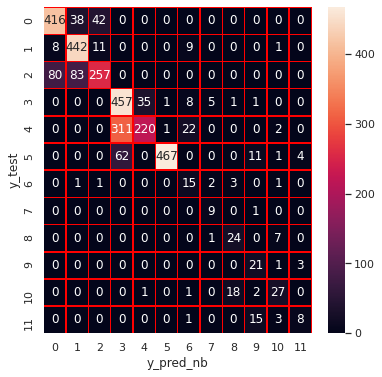

In [25]:
#Confusion Matrix
y_pred_nb= NB.predict(X_test)
CM = confusion_matrix(y_test,y_pred_nb)

#CM visualization
f, ax = plt.subplots(figsize=(6,6))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_nb")
plt.ylabel("y_test")
plt.show()

Decision Tree

In [0]:
#Decision Tree Algorithm
DTC = DecisionTreeClassifier()

In [27]:
#K-fold CV
accuraccies = cross_val_score(estimator = DTC, X= X_train, y=y_train, cv=10)
print("Average Accuracies: ",100*np.mean(accuraccies))
print("Standart Deviation Accuracies: ",100*np.std(accuraccies))

Average Accuracies:  83.54738022263795
Standart Deviation Accuracies:  5.000447821455616


In [28]:
#learning
DTC.fit(X_train,y_train) 

#prediciton
print("Decision Tree Score: ",100*DTC.score(X_test,y_test))
DTCscore = DTC.score(X_test,y_test)

Decision Tree Score:  80.26565464895636


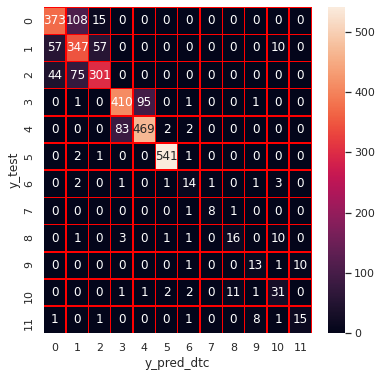

In [29]:
#Confusion Matrix
y_pred_dtc= DTC.predict(X_test)
CM = confusion_matrix(y_test,y_pred_dtc)

#CM visualization
f, ax = plt.subplots(figsize=(6,6))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_dtc")
plt.ylabel("y_test")
plt.show()

Random Forest

In [0]:
#Random Forest
RFC= RandomForestClassifier(n_estimators = 24, random_state=42) #n_estimator = DT

In [31]:
#K-fold CV
accuraccies = cross_val_score(estimator = RFC, X= X_train, y=y_train, cv=10)
print("Average Accuracies: ",100*np.mean(accuraccies))
print("Standart Deviation Accuracies: ",100*np.std(accuraccies))

Average Accuracies:  90.70509758654089
Standart Deviation Accuracies:  3.435946069494014


In [32]:
# learning
RFC.fit(X_train,y_train)

# prediction
print("Random Forest Score: ",100*RFC.score(X_test,y_test))
RFCscore=RFC.score(X_test,y_test)

Random Forest Score:  90.38583175205565


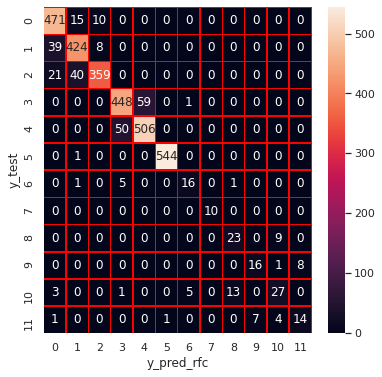

In [33]:
#Confusion Matrix
y_pred_rfc= RFC.predict(X_test)
CM = confusion_matrix(y_test,y_pred_rfc)

#CM visualization
f, ax = plt.subplots(figsize=(6,6))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_rfc")
plt.ylabel("y_test")
plt.show()